In [3]:
df = read.csv('C:/Users/MANI/Documents/R sem 2/logistic_regression/Kid.csv')

# Problem_statement: If the customer will buy the magazine or not.

In [5]:
head(df)

Obs.No.,Buy,Income,Is.Female,Is.Married,Has.College,Is.Professional,Is.Retired,Unemployed,Residence.Length,Dual.Income,Minors,Own,House,White,English,Prev.Child.Mag,Prev.Parent.Mag
1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
6,0,24000,1,1,0,0,0,0,41,0,0,1,1,0,0,0,0


In [27]:
str(df)

'data.frame':	673 obs. of  18 variables:
 $ Obs.No.         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Buy             : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Income          : int  24000 75000 46000 70000 43000 24000 26000 38000 39000 49000 ...
 $ Is.Female       : int  1 1 1 0 1 1 1 1 1 0 ...
 $ Is.Married      : int  0 1 1 1 0 1 1 1 0 1 ...
 $ Has.College     : int  1 1 0 0 0 0 1 0 1 0 ...
 $ Is.Professional : int  1 1 0 1 0 0 0 0 1 0 ...
 $ Is.Retired      : int  0 0 0 0 0 0 1 1 0 1 ...
 $ Unemployed      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Residence.Length: int  26 15 36 55 27 41 20 8 17 31 ...
 $ Dual.Income     : int  0 1 1 0 0 0 0 0 0 0 ...
 $ Minors          : int  0 0 1 0 0 0 1 0 0 0 ...
 $ Own             : int  0 1 1 1 0 1 1 1 0 1 ...
 $ House           : int  1 1 1 1 0 1 1 1 0 1 ...
 $ White           : int  0 1 1 1 1 0 1 1 1 1 ...
 $ English         : int  0 1 1 1 1 0 1 1 1 1 ...
 $ Prev.Child.Mag  : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Prev.Parent.Mag : int  0 0 0 0 1 0 0 0 0 0 ...


In [34]:
library(dplyr)
df <- select(df, -Obs.No.)

# Dropped the column Obs.no(Observation numbers) because it is not required to build the model.

# Looking for missing values using amelia library

In [13]:
library(Amelia)

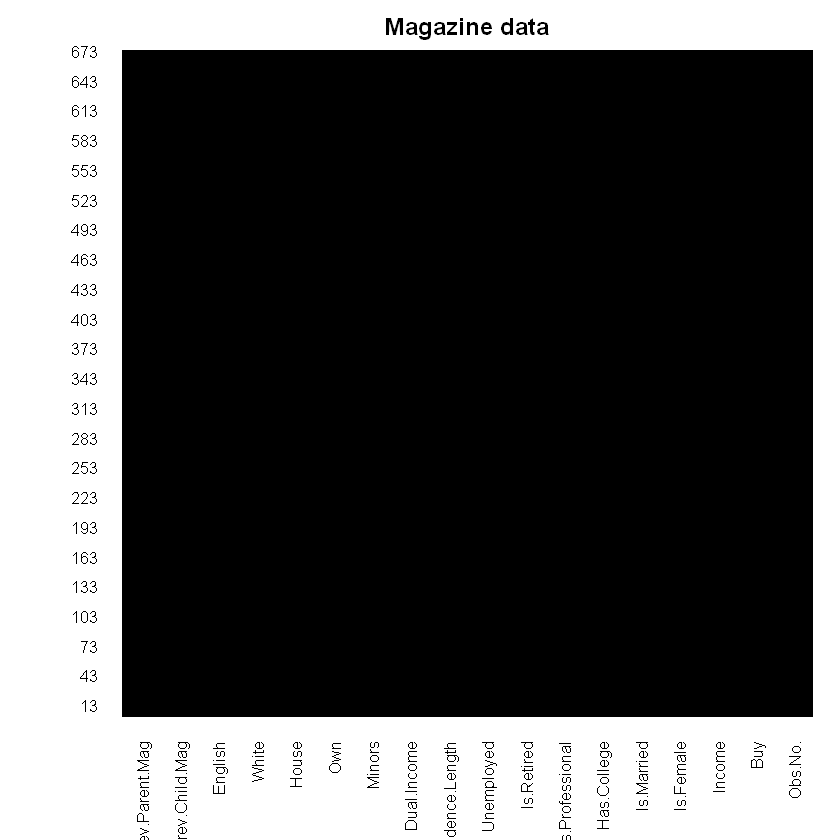

In [14]:
missmap(df, main="Magazine data", 
        col=c("yellow", "black"), legend=FALSE)

# As there are no missing values in the data. We can build the model.

In [16]:
library(ggplot2)

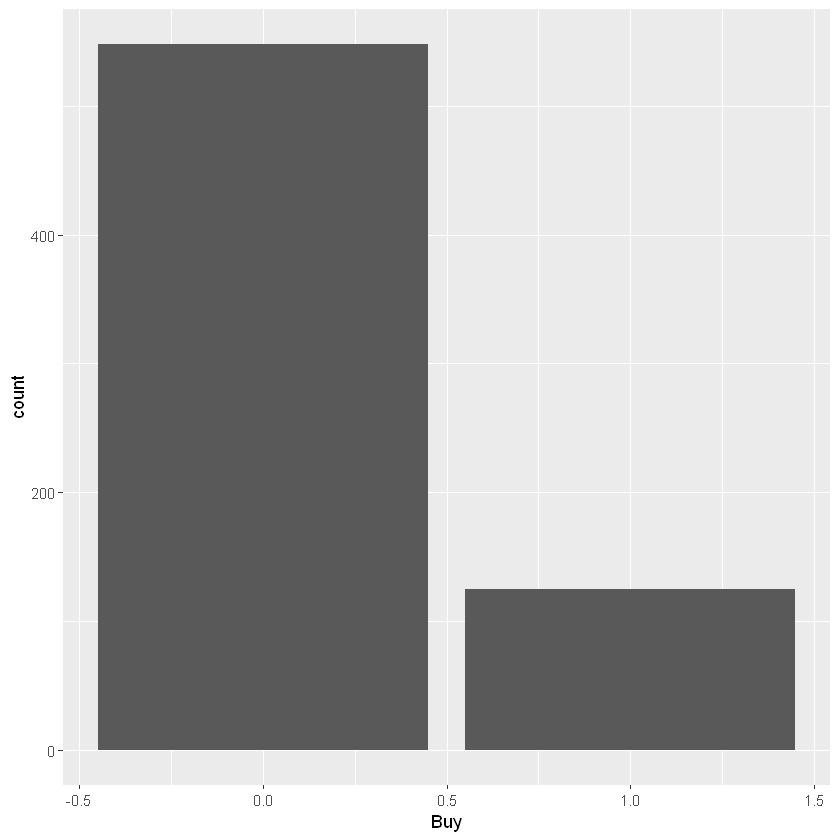

In [17]:
ggplot(df,aes(Buy)) + geom_bar()

# Visualizing the target variable Buy

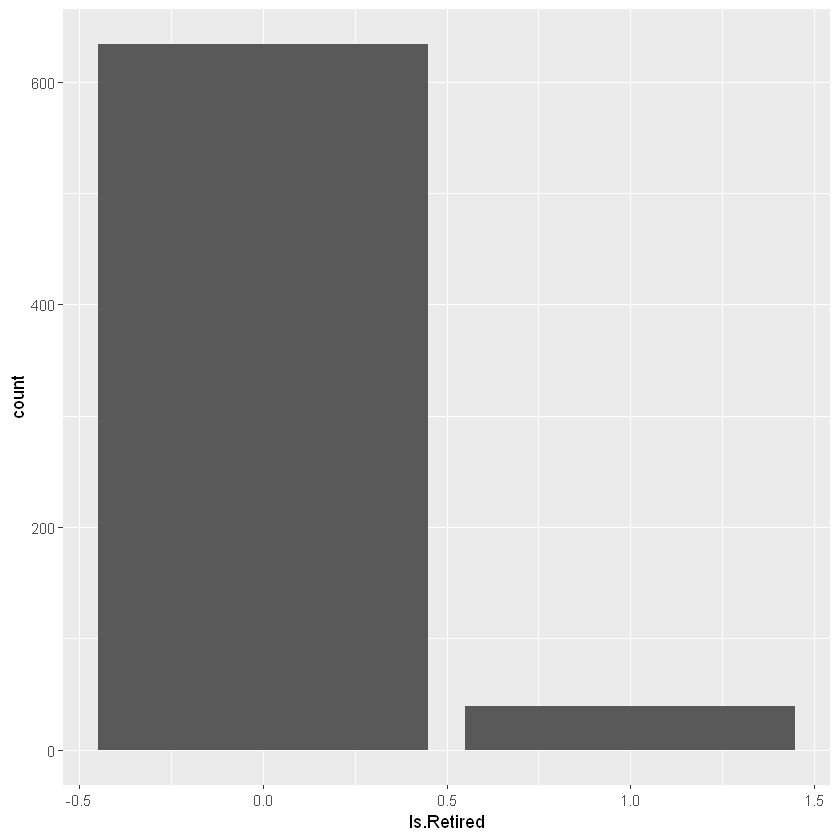

In [19]:
ggplot(df,aes(Is.Retired)) + geom_bar()

# There are less retired guys in the town.

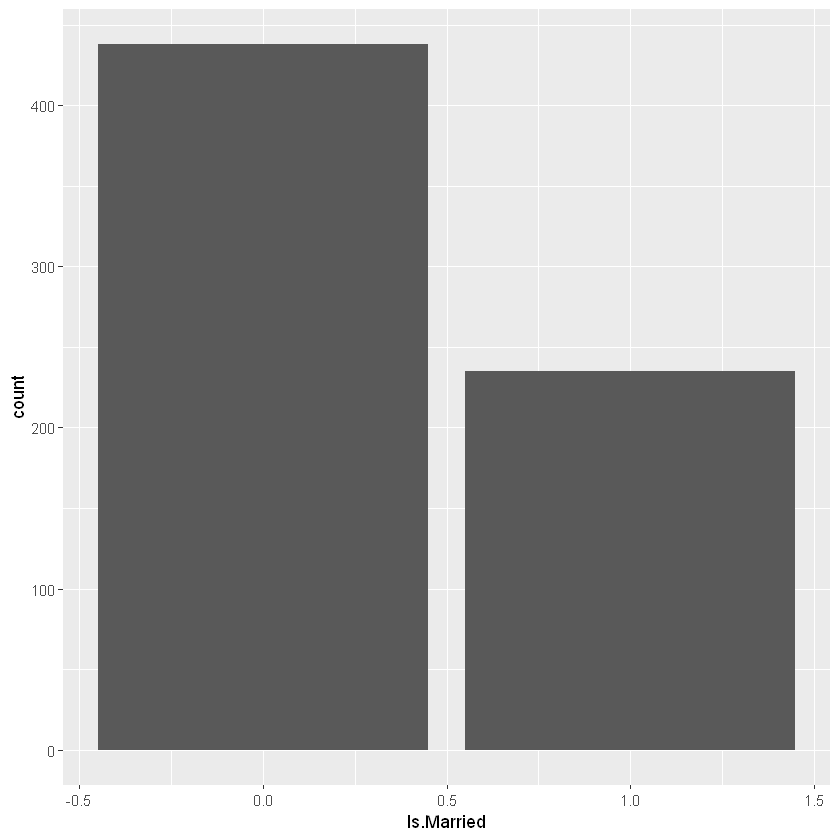

In [22]:
ggplot(df,aes(Is.Married)) + geom_bar()

# There are more number of unmarried guys in the town.

In [41]:
library(caTools)
set.seed(101)

split = sample.split(df$Buy, SplitRatio = 0.80)

final.train = subset(df, split == TRUE)
final.test = subset(df, split == FALSE)

# Splitting the data into train and test using sample.split function by 0.8 ratio.

In [45]:
final.log.model <- glm(formula= Buy ~ . , family = binomial(link='logit'),data = final.train)

In [46]:
summary(final.log.model)


Call:
glm(formula = Buy ~ ., family = binomial(link = "logit"), data = final.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.63022  -0.08797  -0.00809  -0.00136   2.17218  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.813e+01  2.508e+00  -7.228 4.90e-13 ***
Income            2.035e-04  2.679e-05   7.597 3.04e-14 ***
Is.Female         1.183e+00  5.082e-01   2.328  0.01990 *  
Is.Married        3.442e-01  6.640e-01   0.518  0.60415    
Has.College       1.067e-01  4.859e-01   0.220  0.82622    
Is.Professional   1.999e-01  5.281e-01   0.379  0.70504    
Is.Retired       -2.101e+00  1.041e+00  -2.018  0.04354 *  
Unemployed        9.858e-01  6.118e+00   0.161  0.87199    
Residence.Length  4.064e-02  1.677e-02   2.424  0.01537 *  
Dual.Income       7.717e-01  5.763e-01   1.339  0.18055    
Minors            1.679e+00  5.583e-01   3.007  0.00264 ** 
Own               1.036e+00  6.609e-01   1.568  0.11696 

# Training the model using final.train data the target variable is Buy. The independent variables income,white,is retired has less p value from summary function.

In [48]:
fitted.probabilities <- predict(final.log.model,newdata=final.test,type='response')

In [50]:
fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)

In [54]:
misClasificError <- mean(fitted.results != final.test$Buy)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.940740740740741"


# So the accuracy of a model has 94% that it can predict accurately.

In [55]:
table(final.test$Buy, fitted.probabilities > 0.5)

   
    FALSE TRUE
  0   104    6
  1     2   23

# confusion matrix
predicted true negative - 104,
predicted true positive - 23

In [56]:
TP = 23
TN = 104
FP = 6
FN = 2

# Error Rate

In [57]:
error.rate = (FP+FN) / (TP+TN+FN+FP)
error.rate

[1] 0.05925926

# 0.05 is the error rate that the number of all incorrect predictions made by the model

# Sensitivity

In [59]:
SN = (TP) / (TP + FN)
SN

[1] 0.92

# 92% sensitivity is the number of correct positive predictions made by the model

# Specificity

In [60]:
SP = (TN) / (TN + FP)
SP

[1] 0.9454545

# 94% is the percentage of true negative predictions made by the model.

# Precision

In [61]:
prec = (TP) / (TP + FP)
prec

[1] 0.7931034

# when the model predicts yes.We calculate how often it is correct.So the model is 79% correct.¶

# False Positive Rate

In [62]:
FPR = (FP) / (TN +  FP)
FPR

[1] 0.05454545

# false positive rate is when its actually no how often does it predict yes.so the model has 5% predicted yes.

In [64]:
library(pROC)

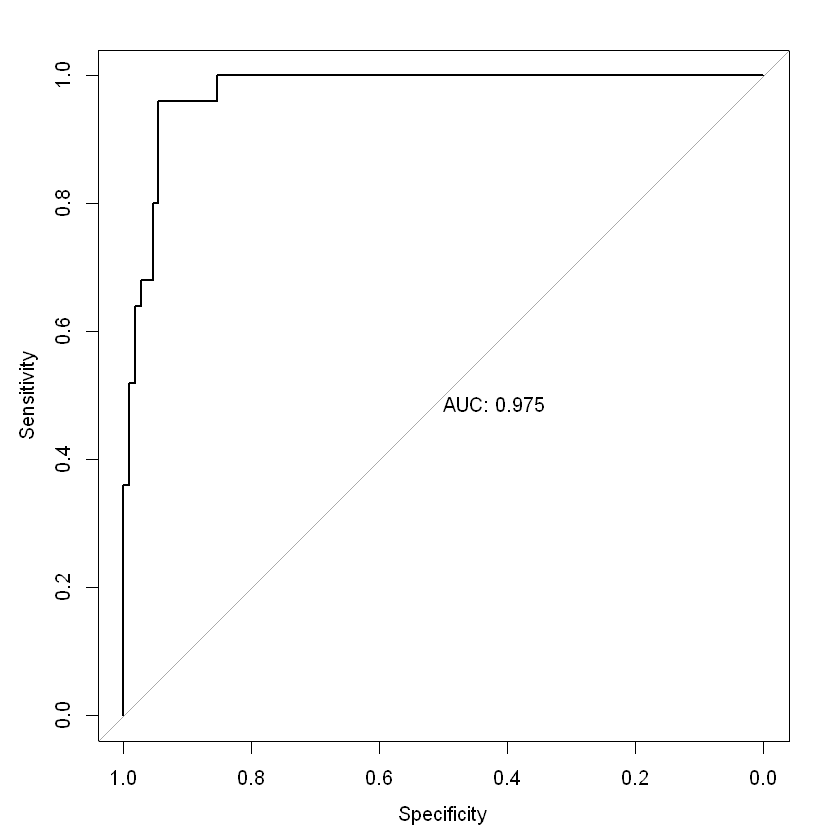

In [65]:
test_roc = roc(final.test$Buy ~ fitted.probabilities, plot =TRUE, print.auc = TRUE)

# Area Under Curve got 97.5% so the model can able to distinguish between positive class 1 and negative class 0.